### Conctinuous & Non-Continuous Distributions - Caleb Wilkins 10/11/2021

This notebook contains a thorough, descriptive walkthrough of examples of both continuous and non-continuous distributions that often appear in statistical analysis. Further, this notebook shows preliminary methods of how to interpret these distributions in regards to probabilities. 

### Continuous Statistics

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

#### Converting a probability into a 'sigma' value. 
In statistics / physics, 'sigma' refers to a measurement of probability. Our first task is to figure out how, given a probability, to calculate the associated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). Integrals of the standard normal (Gaussian) distribution give probabilities. We experiment with the standard normal distribution firsthand by integrating it. We do this by calling to specific statistical cumulative probability distributions with the stats.norm.cdf() function in scipy.

In [2]:
stats.norm.cdf([-0.26, 0, 1.23])

array([0.39743189, 0.5       , 0.89065145])

The 'cdf' function in the scipy package returns the value of the integral (sum of the area under the curve of the distribution) when integrated from infinity to a specified value (or in some cases negative infinity to said value depending on the question asked) that is associated with a given value of sigma (standard deviation). The arguments we give the cdf function in array form are the values of sigma that we are using to test scipy's function against the known z-table. 

We see that the values we obtained using scipy's cdf function match that of the given z-table from Wikipedia: https://en.wikipedia.org/wiki/Standard_normal_table

More often than not, we actually want to do the inverse: so, for a given probability we determine the associated 'sigma' value using stats.norm.ppf(). We'll try several probability values where we know what the answer should be, and show that we get the right answer in terms of sigma. 5 sigma is associated with a probability of about 2.87e-7, thus we test:

In [3]:
stats.norm.ppf(2.87e-7)

-4.999765776842555

1 sigma is associated with a probability of ~0.16, which means 16% of the time a signal could have been produced by background noise. Testing with scipy:

In [4]:
stats.norm.ppf(0.16)

-0.994457883209753

2 sigma is associated with about 95%, thus using the formula for converting between percent and probability: $\frac{(1-0.95)}{2}$ we get a probability of 0.025. Testing with scipy:

In [5]:
stats.norm.ppf(0.025)

-1.9599639845400545

#### "Why is there a minus sign in the results from scipy?" :
When we consider the sigma value associated with a certain probability, we are looking at a distribution with 0.5 at the origin, thus if something has a 50% probability it is associated with 0 sigma. Thus, having a probability of less than 50% would be associated with a negative sigma, and having a probability of more than 50% would be associated with a positive sigma. To show that they are reflections across the y-axis, we repeated the above tests but subsituting the values used for the values subtracted from 1.

In [6]:
stats.norm.ppf(1 - 2.87e-7)

4.9997657768508095

In [7]:
stats.norm.ppf(1 - 0.16)

0.994457883209753

In [8]:
stats.norm.ppf(1 - 0.025)

1.959963984540054

Now, we will explore some other continuous analytic distributions. We will make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time not using the common Gaussian. Let's use the Chi-Squared distribution, for example. (This choice is arbitrary, any other continuous distribution could've been used to prove the same point we will prove: Rayleigh, Lognormal, Gamma, Exponential, etc.)

In [9]:
# Necessary to specify degrees of freedom for particular distribution function, 
# but it is another arbitrary choice (could use any for our example)
degrees_of_freedom = 50

# The 'rvs' method generates a random dataset that is Chi-Squared distributed
chi2 = stats.chi2.rvs(degrees_of_freedom, size = 100000) 

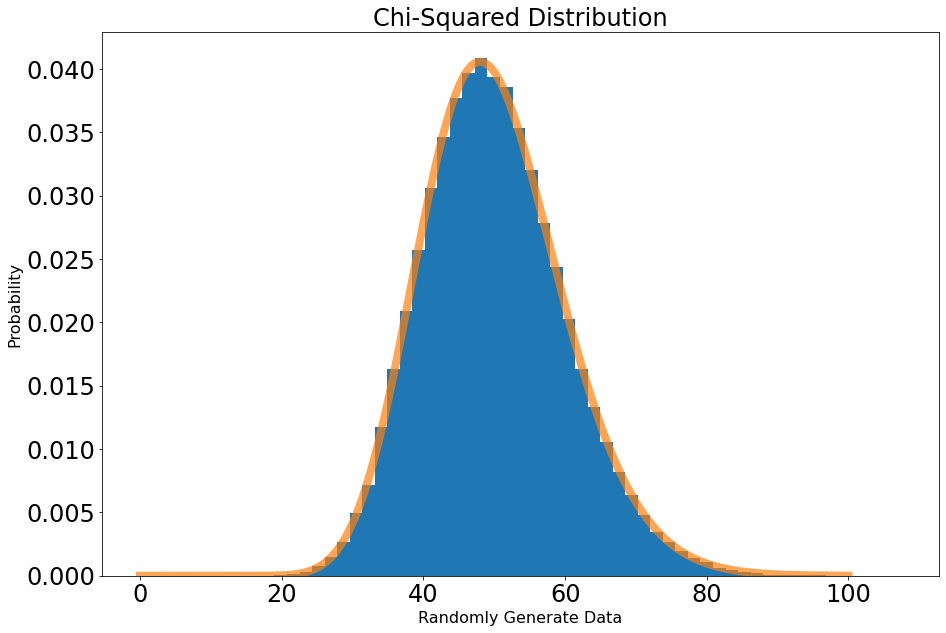

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(chi2,50, density = True)
plt.tick_params(labelsize = 24)
x = np.linspace(0,100,1000)
ax.plot(x,stats.chi2.pdf(x, degrees_of_freedom),linewidth = 8,alpha = 0.7)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Randomly Generate Data', fontsize = 16)
ax.set_title('Chi-Squared Distribution', fontsize = 24)
plt.show();

The chi-square distribution results when a given number of independent variables with standard normal distributions are squared and summed. In a testing context, the chi-square distribution is treated as a "standardized distribution" (i.e., no location or scale parameters). However, in a distributional modeling context (as with other probability distributions), the chi-square distribution itself can be transformed with a location parameter and a scale parameter.

##### Setting the data on a semi-log axis:

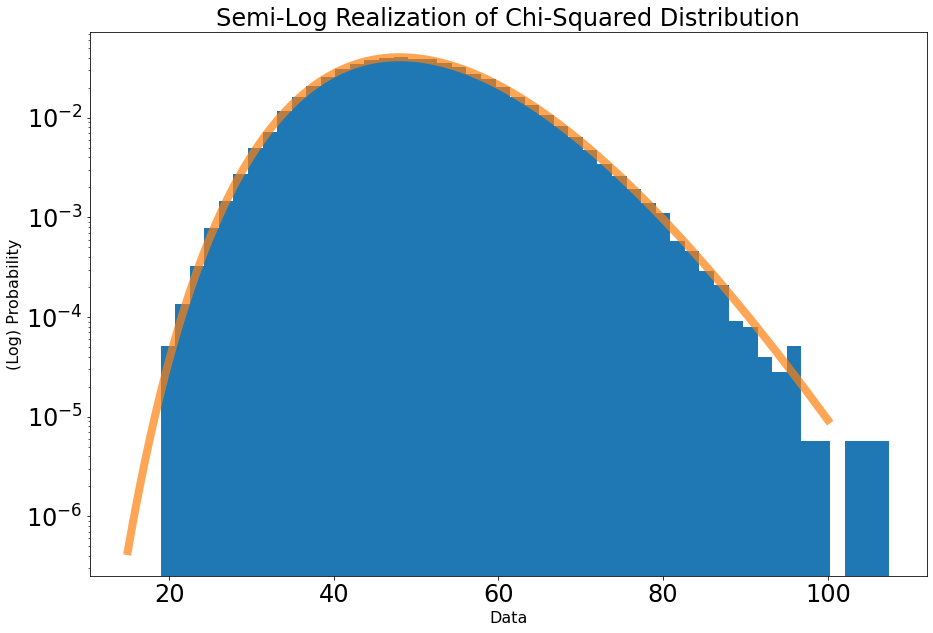

In [11]:
fig, ax = plt.subplots(1, 1)
ax.hist(chi2,50, density = True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
x = np.linspace(15,100,1000)
ax.plot(x,stats.chi2.pdf(x, degrees_of_freedom),linewidth = 8,alpha = 0.7)
ax.set_ylabel('(Log) Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title('Semi-Log Realization of Chi-Squared Distribution', fontsize = 24)
plt.show();

We plot the Chi-Squared distribution on a semi-log plot in order to more plainly observe that it is in fact not a normal distribution (which would have a perfectly parabolic shape on the semi-log scale).

##### Now we will imagine that we have signal-free data that follows the Chi-Squared distribution, and we have a measurement for which we need to determine the 'sigma' value. We will select a value of 65 for our hypothetical measurement.

##### Clearly stating the statistical question we are asking in words:

If we are trying to determine what value of sigma corresponds to measuring a value of 65, what we are asking is: "What is the sigma value associated with the area under the curve of a normal distribution that is equal to the area under the curve of our chi-squared distributed data when integrated from 65 to infinity?" This will tell us what the probability is of the background producing something that is equal or more signal like than the 'signal candidate' at the measured value of 65.

##### Converting our question into a mathematical integral:
If we call our data distribution f(x), the mathematical integral we would be solving would be:
$$
\int_{65}^{\infty} \! f(x) dx
$$
And converting that to an associated sigma value would be solving the equality:
$$
\int_{\sigma}^{\infty} \! n(x) dx = \int_{65}^{\infty} \! f(x) dx
$$
Where we call the normal (Gaussian) distribution n(x).

##### We use this math to calculate the probability that the background produced the signal.

In [12]:
prob_background_prod = 1 - stats.chi2.cdf(65, degrees_of_freedom)
prob_background_prod

0.07536061126255822

##### We then convert the probability into an equivalent 'sigma' value.

In [13]:
my_sigma = stats.norm.ppf(1 - prob_background_prod)
my_sigma

1.4369886361928965

##### We can then explore a little further, testing various hypothetical measurement values and observing how the probabilities and 'sigmas' change.

In [14]:
hypothetical_measurements = 1 - stats.chi2.cdf([28, 55, 82], degrees_of_freedom)
hypothetical_measurements

array([0.99498011, 0.2910103 , 0.00289769])

In [15]:
stats.norm.ppf(1 - hypothetical_measurements)

array([-2.57445601,  0.55043565,  2.75913994])

What we observe is that when we choose values farther from the median of our distribution we get larger sigma values, which is to be expected. Further, for the values left of (less than) the median of our distribution, we get a negative sigma value. 

### Non-Continuous Distributions
In many physics contexts, we are counting descrete events. We can detect 9 gamma-rays or 10 gamma-rays, but 9.2 gamma-rays makes no sense. In these contexts the continuous distributions make no sense and we instead must use discrete distributions. The two most common of these are the Binomial and the Poisson (which is a limiting case of the Binomial).

Whether or not one would recognize it by name, we each have a very personal grasp of what the binomial distribution encompasses because of a simple, universal example of it we all know which is that of the flip of a coin. The key parameters of the binomial distribution are the number of independent experiments performed that each have a result of either 'success' or 'failure' and the probability of each discrete test to result in such a result of 'success' or 'failure'. We can explore the various results of such a distribution by changing the parameters and observing the results, as we will do now.

##### We will make a series of plots with different parameters to explain the features:

In [16]:
# n = number of 'events'
# p = probability of a single success and 1 - p is the probability of a single failure

n, p = 5, 0.4

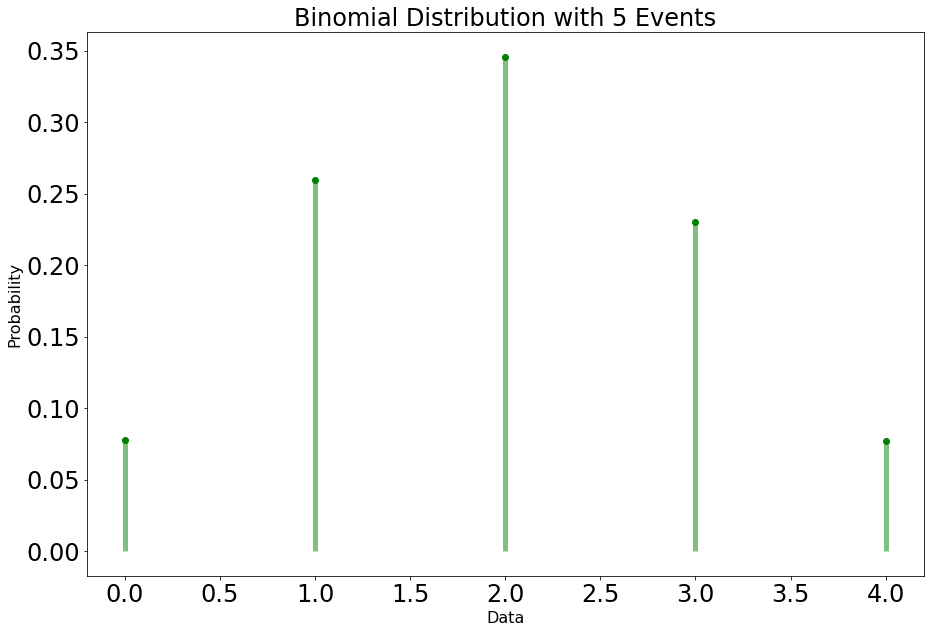

In [17]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

In [18]:
n, p = 10, 0.7

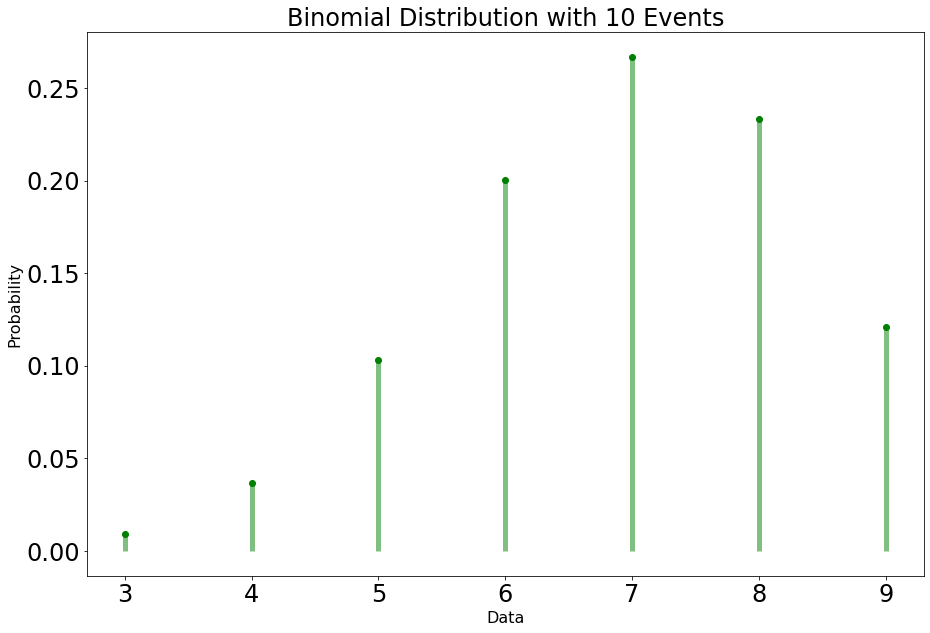

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

In [20]:
n, p = 50, 0.6

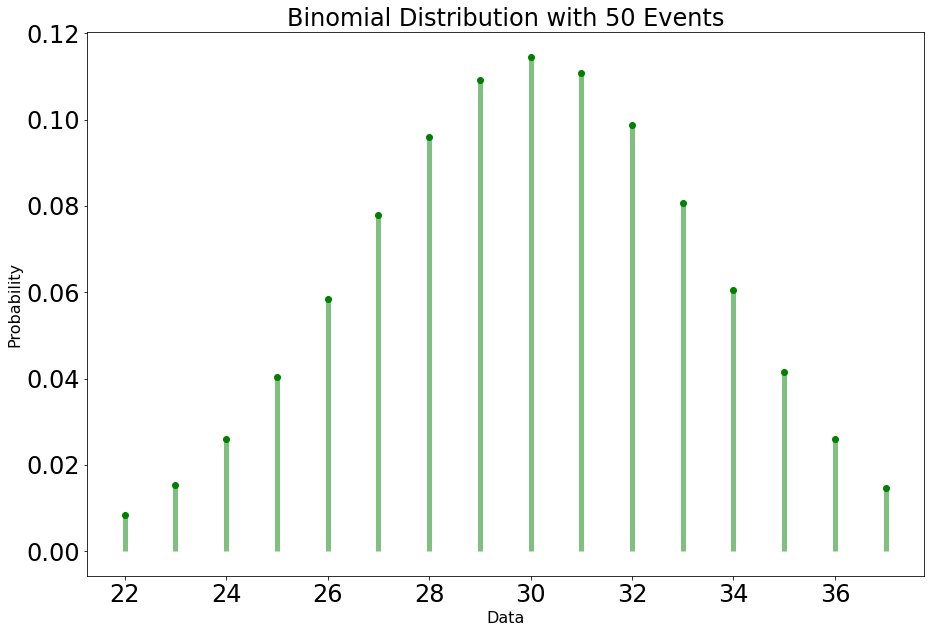

In [21]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

In [22]:
n, p = 100, 0.5

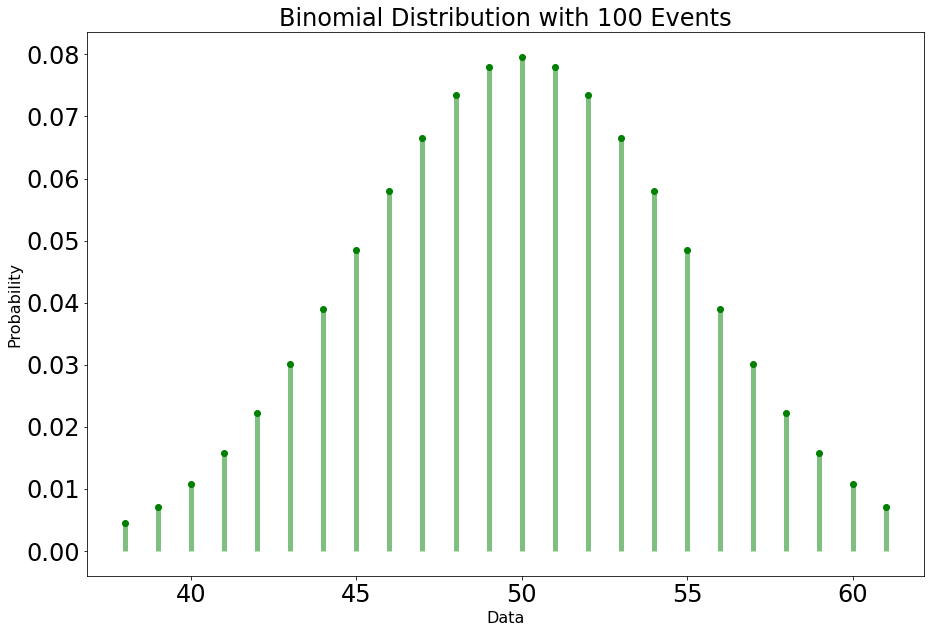

In [23]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

In the above graphs, we vary both the number of experiments performed, as well as the probability of success of each experiment. We observe that as the number of experiments increases, the distribution seemingly becomes more Gaussian in shape. To verify this, we then plot the same distribution as in the last graph on a semi-log axis, as shown below:

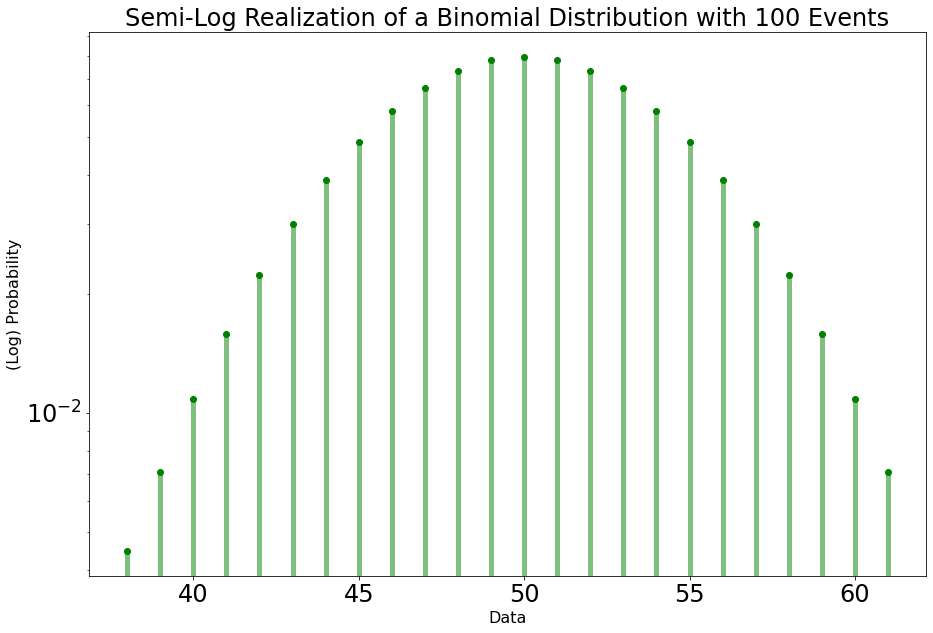

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
plt.yscale('log')
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('(Log) Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Semi-Log Realization of a Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

We see that the distribution takes a parabolic shape when plotted on a semi-log axis, confirming our observation that as n increases the distribution takes on a more Gaussian shape.

##### We will again define a hypothetical question and calculate the corresponding probability:
For this section, we will be asking: "With data that is binomially distributed with the parameters of 50 trials and a 30% chance that each discrete trial results in success, what is the probability that at least 20 trials will result in success?"

In [25]:
n, p = 50, 0.3

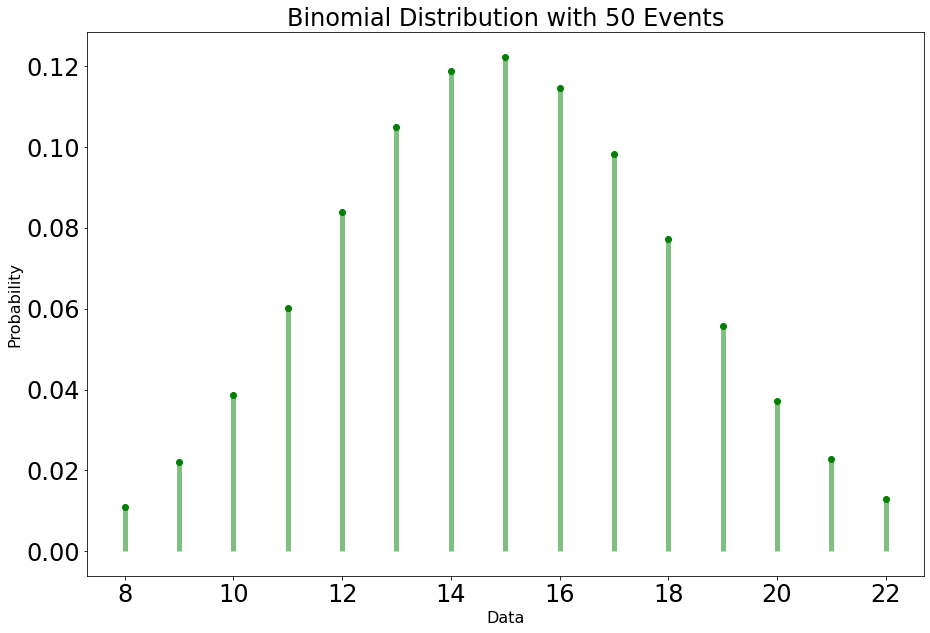

In [26]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.binom.pmf(x, n, p), 'go')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='g',linestyle='-', lw=5, alpha=0.5)
ax.set_ylabel('Probability', fontsize = 16)
ax.set_xlabel('Data', fontsize = 16)
ax.set_title(f'Binomial Distribution with {n} Events', fontsize = 24)
plt.show();

In [27]:
# Let x be the 20 trials referenced in our statistical question
x = 20
prob_binom = 1 - stats.binom.cdf(x, n, p)

In [28]:
sigma_binom = stats.norm.ppf(1-prob_binom)

In [29]:
print(f'The probability that the experiment results in success at least 20 times is {prob_binom:.3f},', 
      f'\nwhich corresponds to a sigma value of {sigma_binom:0.3f}.')

The probability that the experiment results in success at least 20 times is 0.048, 
which corresponds to a sigma value of 1.667.


##### Because the distributions are discrete, so are the probabilities and 'sigmas':
Essentially, since the distribution is not continuous (i.e. in our case of the binomial distribution, each experiment can only result in one value or the other), the summation of these discrete values is restricted to being a discrete value as well. Thus, this makes our probabilities and sigma values discrete as well. 
##### While the results are discrete, the parameters of the distributions are not. 
For example, the mean of a Poisson distribution can be 9.2. Discrete results do not imply an integer value of sigma. This is due to the fact that though the distribution may be discrete, we still report the sigma value the same way as we have discussed prior (as the integral of a normal distribution), which we know is a continuous distribution rather than a discrete one. Thus, getting a sigma value with a decimal number does not contradict having a discrete distribution.